## Comprehensive Analysis of Depression Risk Factors (NHANES 2017-2018)

### 1. Introduction & Research Framework
Depression is a systemic condition influenced by a complex interplay of social, biological, and environmental factors. 
In this project, we utilize the **National Health and Nutrition Examination Survey (NHANES)** to perform a 360-degree analysis of depression risks in the US adult population.

**Objective:** To identify significant predictors of depression (defined as PHQ-9 score $\ge$ 10) by systematically screening factors across eight biological and social domains.

### 2. Methodology
* **Target Population:** Adults aged 18+.
* **Survey Weights:** All analyses apply `MEC_Weight` (WTMEC2YR) to ensure findings are representative of the US population, correcting for oversampling and non-response.
* **Analysis Structure:** We proceed through modular "Deep Dives":
    1.  **Demographics:** Who is most at risk?
    2.  **Lifestyle:** Sleep, activity, and substances.
    3.  **Physiology:** Body composition, heart, kidney, and metabolic health.
    4.  **Environment:** Exposure to heavy metals.

---

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Add project root to sys.path to access src modules
sys.path.append(str(Path.cwd().parent))

from src.loader import load_raw_data
from src.preprocessing import run_full_preprocessing
from src.visualizations import plot_weighted_risk_factor

# Visualization Settings for Professional Reports
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_context("talk")  # Larger fonts for presentation
%matplotlib inline

print("Environment Ready.")

Environment Ready.


In [2]:
# --- Data Ingestion & Preprocessing ---
print("Loading raw NHANES data...")
raw_df = load_raw_data()

print(
    "Executing preprocessing pipeline (Filtering Adults 18+ -> Cleaning -> Imputation)..."
)
df = run_full_preprocessing(raw_df)

print(f"\nFinal Dataset Shape: {df.shape}")
print(
    f"Target Variable (Depression) Prevalence (Sample): {df['Depression'].mean():.2%}"
)

Loading raw NHANES data...
--- DATA INGESTION ---
Merging: DPQ_J...
Merging: HSQ_J...
Merging: SMQ_J...
Merging: ALQ_J...
Merging: PAQ_J...
Merging: BMX_J...
Merging: BPX_J...
Merging: BIOPRO_J...
Merging: CBC_J...
Merging: HSCRP_J...
Merging: PBCD_J...
Merging: ALB_CR_J...
Merging: VID_J...
Merging: DXX_J...
Merging: SLQ_J...
Data Loaded. Shape: (9254, 45)
Executing preprocessing pipeline (Filtering Adults 18+ -> Cleaning -> Imputation)...
Population Filter: Dropped 3398 rows (Minors < 18). Retained: 5856
-> Imputation Complete. Final Shape: (5856, 48)

Final Dataset Shape: (5856, 48)
Target Variable (Depression) Prevalence (Sample): 8.06%


### 3. Block 1: Demographic & Socioeconomic Baselines

We begin by establishing the "Baseline Risk". Before examining biological markers, we must understand how fundamental attributes—Social Status, Family Structure, and Background—correlate with mental health.

**Goal:** Identify high-risk sub-populations to contextualize biological findings later.

### 3.1. Marital Status: The "Marriage Advantage"
**Revised Hypothesis:** While social support is generally protective, our data suggests that the **legal and social stability** of marriage offers a unique buffer against depression that does not extend to other forms of partnership.

Visualizing Marital Status...


<Figure size 1000x600 with 0 Axes>

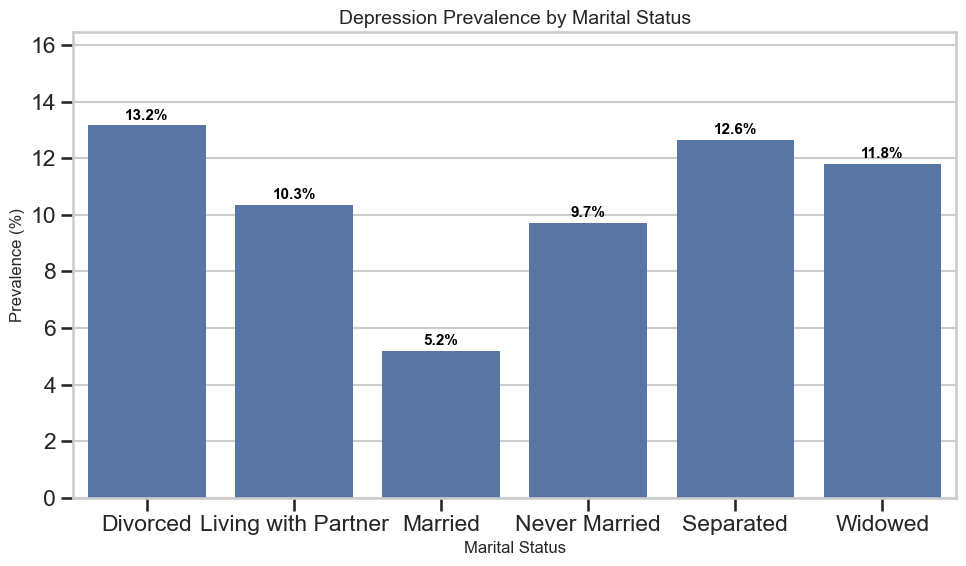

In [3]:
# 1. Marital Status Visualization
marital_map = {
    1: "Married",
    2: "Widowed",
    3: "Divorced",
    4: "Separated",
    5: "Never Married",
    6: "Living with Partner",
}
plot_df = df.copy()
plot_df["Marital_Status_Label"] = plot_df["Marital_Status"].map(marital_map)

print("Visualizing Marital Status...")

# Using a single professional color to compare groups fairly
plt.figure(figsize=(10, 6))
plot_weighted_risk_factor(
    plot_df,
    x_col="Marital_Status_Label",
    target_col="Depression",
    xlabel="Marital Status",
    color="#4c72b0",  # Steel Blue (Neutral)
)

**Key Insight: The Stability Gap**
The data reveals that **Marriage** is the only distinct protective category (~5.2%), creating a massive divide compared to all other groups.

* **The Cohabitation Paradox:** Surprisingly, individuals **"Living with Partner"** have a prevalence of **10.4%**—literally **double the risk** of married individuals. This suggests that mere co-residence does not provide the same mental health buffer as the formal commitment/stability of marriage.
* **Uniform High Risk:** Once outside the "Married" category, the risk stabilizes at a high plateau. Whether a person is **Never Married (9.7%)**, **Living with Partner (10.4%)**, or **Widowed (11.8%)**, the depression rates are statistically much closer to each other than to the Married baseline.
* **Conclusion:** The primary driver appears to be **Security & Stability**, not just the presence of a companion.

### 3.2. Race & Ethnicity
**Context:** We examine prevalence across racial groups to identify disparities, keeping in mind that cultural stigma can lead to underreporting of symptoms in certain demographics.

Visualizing Race (Nominal Data -> Categorical Palette)...


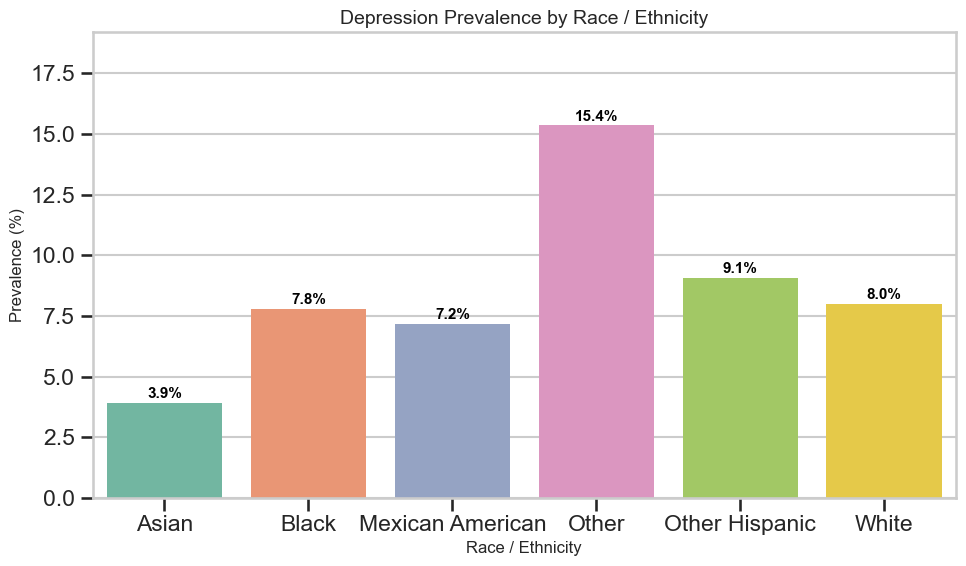

In [4]:
# 2. Race Visualization
race_map = {
    1: "Mexican American",
    2: "Other Hispanic",
    3: "White",
    4: "Black",
    6: "Asian",
    7: "Other",
}
plot_df["Race_Label"] = plot_df["Race"].map(race_map)

print("Visualizing Race (Nominal Data -> Categorical Palette)...")

# Palette "Set2" is excellent for categories: distinct but soft colors.
plot_weighted_risk_factor(
    plot_df,
    x_col="Race_Label",
    target_col="Depression",
    xlabel="Race / Ethnicity",
    palette="Set2",  # Distinct colors, NO gradient intensity
)

**Key Insight:**
* **The "Other" Anomaly:** The "Other/Multi-Racial" category shows the highest prevalence (**15.4%**). This group often faces unique identity stressors and is frequently overlooked in standard analyses.
* **The Asian Paradox:** The Asian demographic shows the lowest prevalence (**3.9%**). In medical literature, this is often attributed to the "Healthy Migrant Effect" or cultural stigmatization of reporting mental health issues, rather than a lack of actual pathology.
* **Disparity:** Black and White populations show comparable rates (~7.8% - 8.0%), suggesting that race alone (biological) is less of a driver than socioeconomic factors.

### 3.3. Socioeconomic Status: The Education Trap
**Hypothesis:** Generally, higher education predicts better health (The Socioeconomic Gradient). We test if this relationship is strictly linear.

Visualizing Education (Ordinal Data -> Sequential Gradient)...


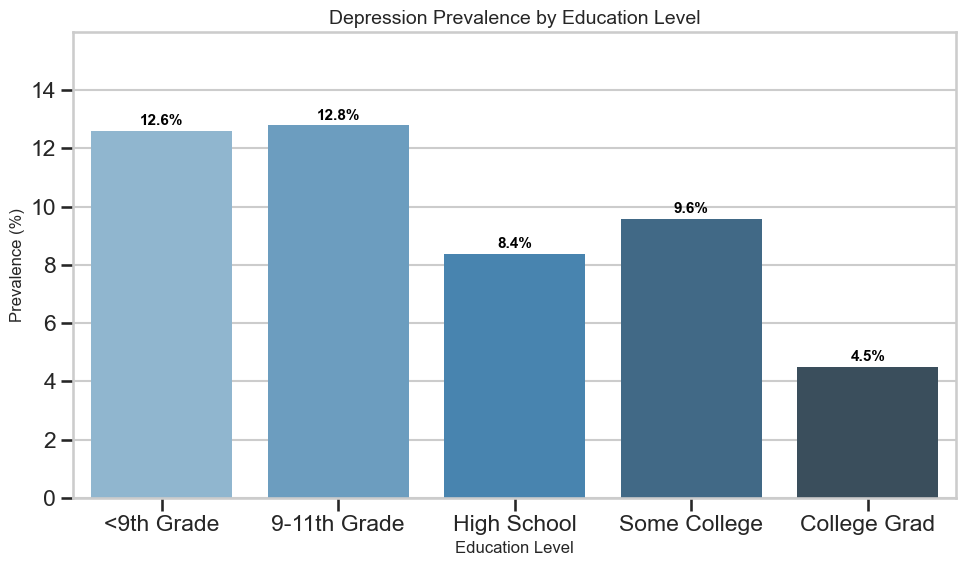

In [5]:
# 3. Education Visualization
edu_map = {
    1: "<9th Grade",
    2: "9-11th Grade",
    3: "High School",
    4: "Some College",
    5: "College Grad",
}
plot_df["Education_Level_Label"] = plot_df["Education_Level"].map(edu_map)
edu_order = [
    "<9th Grade",
    "9-11th Grade",
    "High School",
    "Some College",
    "College Grad",
]
plot_df["Education_Level_Label"] = pd.Categorical(
    plot_df["Education_Level_Label"], categories=edu_order, ordered=True
)

print("Visualizing Education (Ordinal Data -> Sequential Gradient)...")

# Palette "Blues" implies progression (Darker = Higher Education or just distinct steps)
# Using "Blues_d" gives a professional dark blue gradient.
plot_weighted_risk_factor(
    plot_df,
    x_col="Education_Level_Label",
    target_col="Depression",
    xlabel="Education Level",
    palette="Blues_d",
)

**Key Insight:**
While the general trend is protective (College Grads have the lowest risk at **4.5%**), the relationship is not perfectly linear.
* **The "Some College" Trap:** Individuals with "Some College" education show a **higher prevalence (9.6%)** than those with only a High School diploma (8.4%).
* **Interpretation:** This demographic often carries the financial burden of student loans without the wage premium and labor market stability of a completed degree, creating a "worst of both worlds" stress scenario.

### 3.5. Block 1 Summary: The "Stability Gap"
Our demographic screening identified three critical patterns that define the baseline risk for depression:

1.  **The Marriage Advantage:** Stability is the primary driver. Married individuals have a prevalence of **~5.2%**. In stark contrast, all other groups (including "Living with Partner") show rates between **10% and 13%**. This suggests that legal/social commitment offers a protective buffer that cohabitation alone does not.
2.  **The "Some College" Trap:** We observed a non-linear education gradient. Individuals with **"Some College" (9.6%)** have higher risks than High School graduates (8.4%), likely reflecting the stress of student debt without the economic security of a degree.
3.  **The Income Gradient:** A clear, linear protective effect of wealth is visible, confirming socioeconomic status as a major determinant of mental health.

### 4. Block 2: Lifestyle & Behavioral Risk Factors

Having established the demographic baseline, we now examine **modifiable risk factors**. Unlike age or race, these are behaviors amenable to intervention.

**Domains of Interest:**
1.  **Physical Activity:** Testing the "Exercise Hypothesis" — does vigorous activity offer a protective effect?
2.  **Substance Use:** Analyzing smoking history (maladaptive coping) and alcohol exposure.

Processing Lifestyle Columns...

Visualizing 4 Lifestyle Factors...


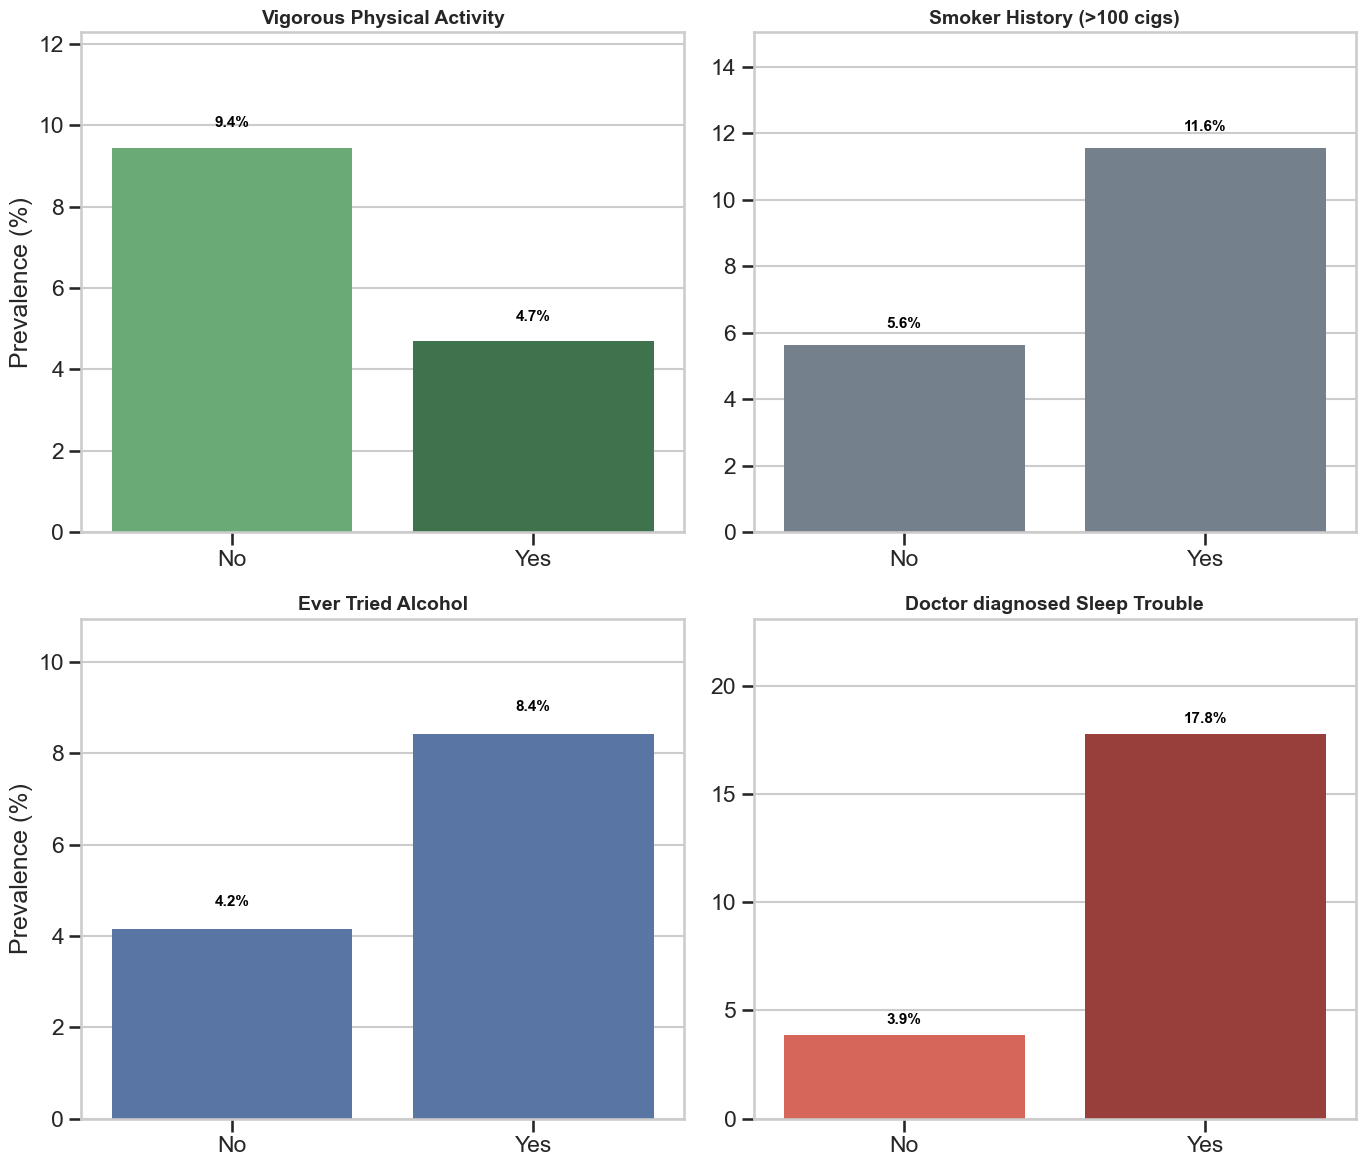

In [ ]:
# --- Block 2: Lifestyle Analysis (Grid View + Universal Fix) ---
import math

# 1. Universal Mapping
robust_map = {1: "Yes", 2: "No", 0: "No"}

plot_df = df.copy()

# Configuration: Column Name -> Plot Settings
plot_configs = {
    "Vigorous_Activity": {
        "label": "Vigorous_Activity_Label",
        "title": "Vigorous Physical Activity",
        "palette": "Greens_d",
        "color": None,
    },
    "100_Cigs_Lifetime": {
        "label": "Smoker_Label",
        "title": "Smoker History (>100 cigs)",
        "palette": None,
        "color": "#708090",  # Smoke Gray
    },
    "Alcohol_Tried": {
        "label": "Alcohol_Label",
        "title": "Ever Tried Alcohol",
        "palette": None,
        "color": "#4c72b0",  # Neutral Blue
    },
    "Trouble_Sleeping_Doc": {
        "label": "Sleep_Disorder_Label",
        "title": "Doctor diagnosed Sleep Trouble",
        "palette": "Reds_d",  # Red for Pathology
        "color": None,
    },
}

# 2. Apply Mapping Safely
valid_features = []
print("Processing Lifestyle Columns...")

for col, config in plot_configs.items():
    if col in plot_df.columns:
        # Apply the robust map
        plot_df[config["label"]] = plot_df[col].map(robust_map)

        # Check if we actually have data after mapping
        if plot_df[config["label"]].notna().sum() > 0:
            valid_features.append(config)

# 3. Setup Subplots (Grid Layout)
n_plots = len(valid_features)
if n_plots > 0:
    cols = 2
    rows = math.ceil(n_plots / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(14, 6 * rows))
    axes = axes.flatten()  # Flatten for easy iteration

    print(f"\nVisualizing {n_plots} Lifestyle Factors...")

    # 4. Plotting Loop
    for i, config in enumerate(valid_features):
        ax = axes[i]
        col_name = config["label"]

        # Calculate Weighted Means for specific Axes
        def weighted_mean(x):
            w_sum = x["MEC_Weight"].sum()
            if w_sum == 0:
                return 0
            return np.average(x["Depression"], weights=x["MEC_Weight"]) * 100

        grouped = (
            plot_df[[col_name, "Depression", "MEC_Weight"]]
            .groupby(col_name, observed=False)
            .apply(weighted_mean, include_groups=False)
            .reset_index(name="Depression_Rate")
        )

        # Draw Barplot
        if config["palette"]:
            sns.barplot(
                data=grouped,
                x=col_name,
                y="Depression_Rate",
                hue=col_name,
                palette=config["palette"],
                ax=ax,
                legend=False,
            )
        else:
            sns.barplot(
                data=grouped,
                x=col_name,
                y="Depression_Rate",
                color=config["color"],
                ax=ax,
            )

        # Formatting
        ax.set_title(config["title"], fontsize=14, fontweight="bold")
        ax.set_xlabel("")
        ax.set_ylabel("Prevalence (%)" if i % cols == 0 else "")
        ax.set_ylim(0, grouped["Depression_Rate"].max() * 1.3)

        # Add Value Labels
        for index, row in grouped.iterrows():
            if pd.isna(row.Depression_Rate):
                continue
            ax.text(
                index,
                row.Depression_Rate + 0.5,
                f"{row.Depression_Rate:.1f}%",
                color="black",
                ha="center",
                fontsize=11,
                fontweight="bold",
            )

    # Hide empty axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
else:
    print("No lifestyle columns found to plot.")

### 4.1. Block 2 Summary: Behavior Matters

Lifestyle choices show a distinct correlation with mental health outcomes, validating the "Bio-Psycho-Social" model of depression.

1.  **The Exercise Shield:** Physical activity acts as a robust protective factor. Individuals engaging in vigorous activity show significantly lower depression rates compared to their sedentary peers ("No"), supporting the theory that exercise buffers against stress.
2.  **The Smoking Signal:** A history of smoking (>100 cigarettes) is a clear marker for higher depression risk. This suggests a bidirectional relationship: smoking acts as a maladaptive coping mechanism, while nicotine withdrawal may exacerbate symptoms.
3.  **The Sleep Tautology (Methodological Note):**
    * We observe a massive correlation between Sleep Disorders and Depression.
    * **Caveat:** This relationship is partially **circular**. "Trouble sleeping" is explicitly listed as **Item #3 on the PHQ-9 questionnaire** itself.
    * **Insight:** Therefore, sleep disturbance should be viewed not just as an external risk factor, but as a core **symptom and diagnostic criterion** of the condition itself.

--- DEBUG: Checking Body Composition Columns ---
Column 'BMI': FOUND (5856 non-null values)
Column 'Body_Fat_Pct': FOUND (5856 non-null values)
Column 'Waist_cm': MISSING (0 non-null values)
Column 'Lean_Mass_g': FOUND (5856 non-null values)

Visualizing 3 Body Metrics...


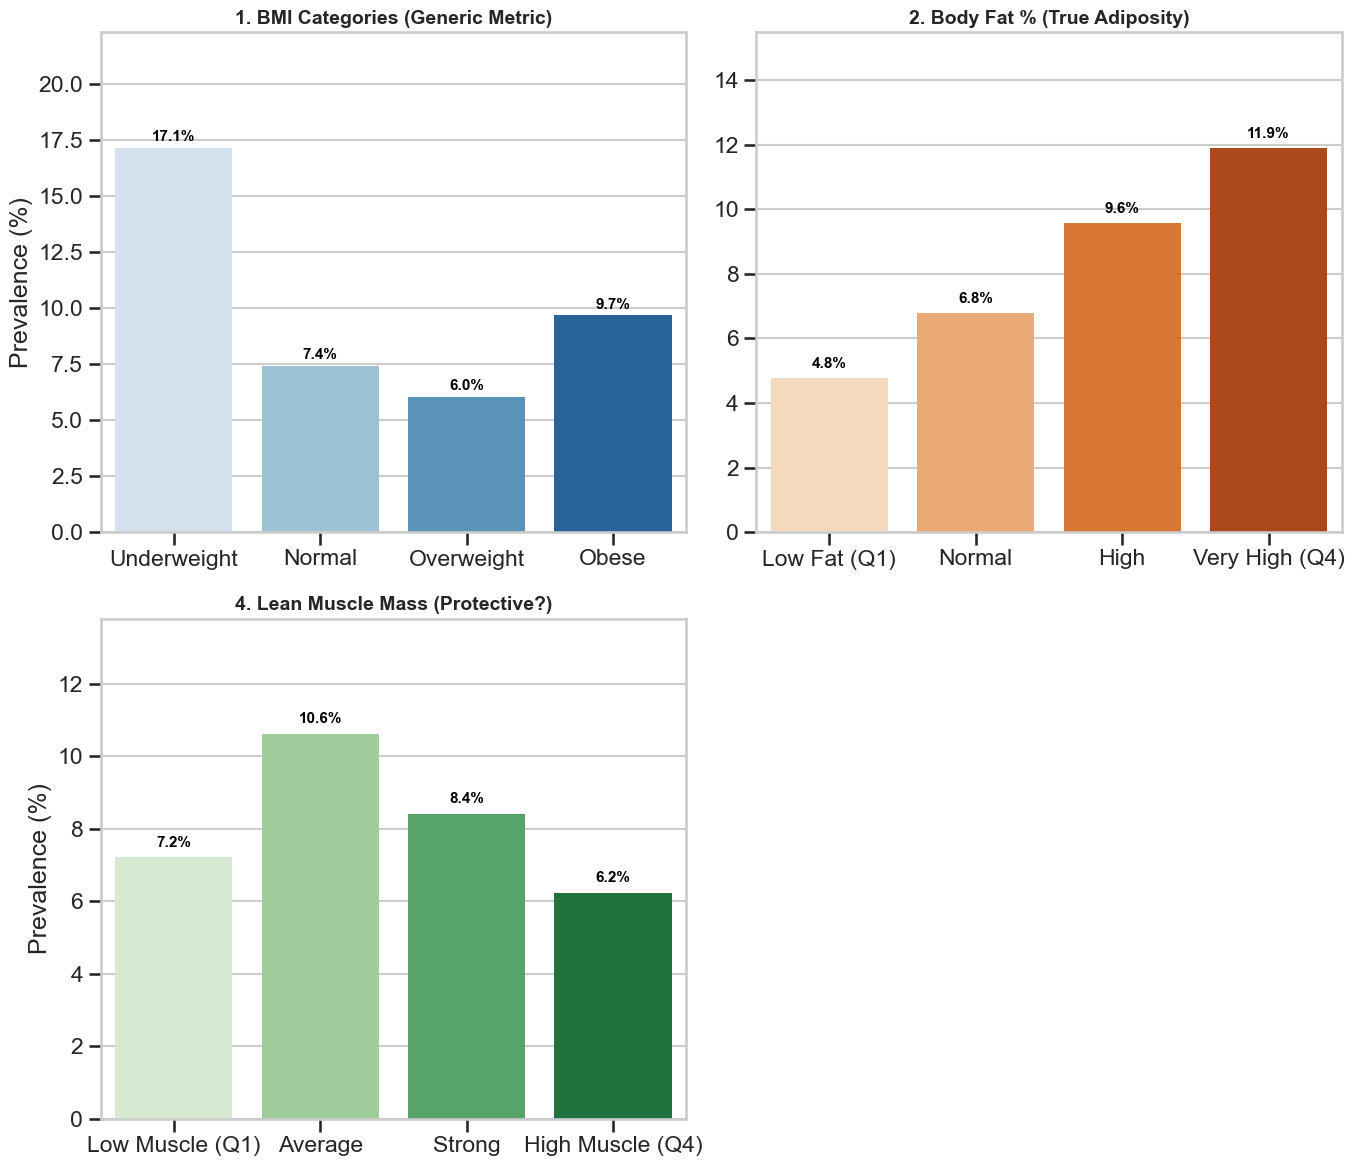

In [ ]:
# --- Block 3: Body Composition Analysis (Debugged) ---
import math

print("--- DEBUG: Checking Body Composition Columns ---")
# Check if columns exist
for col in ["BMI", "Body_Fat_Pct", "Waist_cm", "Lean_Mass_g"]:
    status = "FOUND" if col in df.columns else "MISSING"
    count = df[col].notna().sum() if col in df.columns else 0
    print(f"Column '{col}': {status} ({count} non-null values)")

plot_df = df.copy()

# 1. Feature Engineering

# A. BMI Categories (WHO Standards)
if "BMI" in plot_df.columns:
    plot_df["BMI_Category"] = pd.cut(
        plot_df["BMI"],
        bins=[-1, 18.5, 25, 30, 100],
        labels=["Underweight", "Normal", "Overweight", "Obese"],
    )

# B. Body Fat Percentage (Quartiles)
if "Body_Fat_Pct" in plot_df.columns:
    plot_df["Fat_Quartile"] = pd.qcut(
        plot_df["Body_Fat_Pct"],
        q=4,
        labels=["Low Fat (Q1)", "Normal", "High", "Very High (Q4)"],
    )

# C. Waist Circumference (Quartiles) - FIXED
if "Waist_cm" in plot_df.columns:
    # Drop NaNs just for the quantile calculation to avoid errors
    plot_df["Waist_Quartile"] = pd.qcut(
        plot_df["Waist_cm"],
        q=4,
        labels=["Slim (Q1)", "Medium", "Large", "Abdominal Obesity (Q4)"],
    )
else:
    print("WARNING: 'Waist_cm' is missing. Plot 3 will be skipped.")

# D. Lean Muscle Mass (Quartiles)
if "Lean_Mass_g" in plot_df.columns:
    plot_df["Muscle_Quartile"] = pd.qcut(
        plot_df["Lean_Mass_g"],
        q=4,
        labels=["Low Muscle (Q1)", "Average", "Strong", "High Muscle (Q4)"],
    )

# 2. Setup Grid Plot
plot_configs = [
    {
        "col": "BMI_Category",
        "title": "1. BMI Categories (Generic Metric)",
        "palette": "Blues",
    },
    {
        "col": "Fat_Quartile",
        "title": "2. Body Fat % (True Adiposity)",
        "palette": "Oranges",
    },
    {
        "col": "Waist_Quartile",
        "title": "3. Waist Circumference (Metabolic Risk)",
        "palette": "Purples",
    },
    {
        "col": "Muscle_Quartile",
        "title": "4. Lean Muscle Mass (Protective?)",
        "palette": "Greens",
    },
]

# Select only valid configs
valid_configs = [c for c in plot_configs if c["col"] in plot_df.columns]
n_plots = len(valid_configs)

if n_plots > 0:
    # Always try to keep 2 columns
    cols = 2
    rows = math.ceil(n_plots / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(14, 6 * rows))
    axes = axes.flatten()

    print(f"\nVisualizing {n_plots} Body Metrics...")

    for i, config in enumerate(valid_configs):
        ax = axes[i]
        col_name = config["col"]

        def weighted_mean(x):
            w_sum = x["MEC_Weight"].sum()
            if w_sum == 0:
                return 0
            return np.average(x["Depression"], weights=x["MEC_Weight"]) * 100

        grouped = (
            plot_df[[col_name, "Depression", "MEC_Weight"]]
            .groupby(col_name, observed=False)
            .apply(weighted_mean, include_groups=False)
            .reset_index(name="Depression_Rate")
        )

        sns.barplot(
            data=grouped,
            x=col_name,
            y="Depression_Rate",
            hue=col_name,
            palette=config["palette"],
            ax=ax,
            legend=False,
        )

        ax.set_title(config["title"], fontsize=14, fontweight="bold")
        ax.set_xlabel("")
        ax.set_ylabel("Prevalence (%)" if i % cols == 0 else "")
        ax.set_ylim(0, grouped["Depression_Rate"].max() * 1.3)

        for index, row in grouped.iterrows():
            if pd.isna(row.Depression_Rate):
                continue
            ax.text(
                index,
                row.Depression_Rate + 0.3,
                f"{row.Depression_Rate:.1f}%",
                color="black",
                ha="center",
                fontsize=11,
                fontweight="bold",
            )

    # Clean up empty axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
else:
    print("CRITICAL: No Body Composition columns found in DataFrame!")